# Experiments with dataset

In [1]:
from context import km3net
from km3net.utils import DATADIR
import km3net.model.utils as model_utils
import km3net.model.eval as model_eval
import km3net.data.utils as data_utils
import km3net.model.data.pm as data_pm
from km3net.model.mlp import MLP
from torch.nn import BCELoss
from torch.optim import SGD, Adam
import torch
import pandas as pd

## Experiment 1

### Parameters
- Data: 10% of slice 615 (equalized classes)
- Loss: BCELoss
- Optimizer: SGD(lr=0.001, momentum=0.9)
- Layers: (8, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 100

### Remarks
Model does not obtain a reasonable recall.

train size: 9253, valid size: 4557, test size: 364231
---
epochs: 0, train loss: 0.042, valid loss: 0.041
epochs: 1, train loss: 0.039, valid loss: 0.038
epochs: 2, train loss: 0.036, valid loss: 0.036
epochs: 3, train loss: 0.034, valid loss: 0.033
epochs: 4, train loss: 0.031, valid loss: 0.031
epochs: 5, train loss: 0.029, valid loss: 0.029
epochs: 6, train loss: 0.027, valid loss: 0.026
epochs: 7, train loss: 0.025, valid loss: 0.024
epochs: 8, train loss: 0.023, valid loss: 0.023
epochs: 9, train loss: 0.022, valid loss: 0.022
epochs: 10, train loss: 0.021, valid loss: 0.020
epochs: 11, train loss: 0.020, valid loss: 0.019
epochs: 12, train loss: 0.018, valid loss: 0.018
epochs: 13, train loss: 0.017, valid loss: 0.017
epochs: 14, train loss: 0.016, valid loss: 0.016
epochs: 15, train loss: 0.015, valid loss: 0.015
epochs: 16, train loss: 0.014, valid loss: 0.014
epochs: 17, train loss: 0.013, valid loss: 0.013
epochs: 18, train loss: 0.013, valid loss: 0.012
epochs: 19, train los

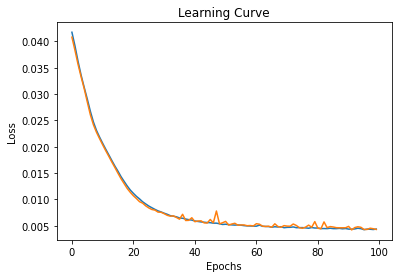

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


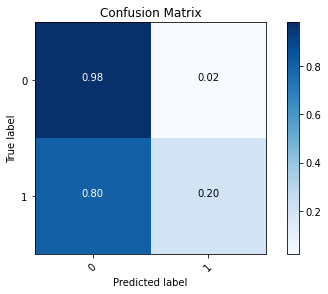

<Figure size 576x576 with 0 Axes>

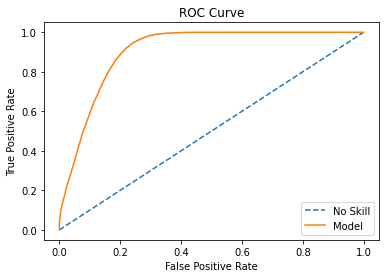

<Figure size 576x576 with 0 Axes>

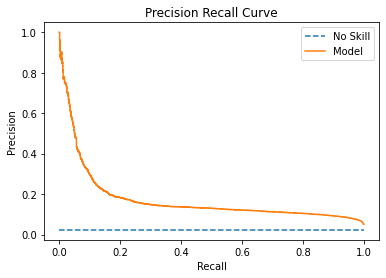

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    355859
         1.0       0.18      0.20      0.19      8372

    accuracy                           0.96    364231
   macro avg       0.58      0.59      0.59    364231
weighted avg       0.96      0.96      0.96    364231

ROC AUC: 0.904
Precision Recall AUC: 0.174
F1 Score: 0.190
F2 Score: 0.195


In [5]:
train_path = DATADIR+'/train/slice-615-10-equal.csv'
test_path = DATADIR+'/test/slice-1637-10.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(8).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 100,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 1.a
Next, we increase the size of training set whilst keeping the parameters the same.

### Parameters
- Data: 25% of slice 615 (equalized classes)
- Loss: BCELoss
- Optimizer: SGD(lr=0.001, momentum=0.9)
- Layers: (8, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 10

### Remarks
Reasonable convergence of loss functions, slight improvement across all metrics compared to exp 1.

train size: 42407, valid size: 20887, test size: 364231
---
epochs: 0, train loss: 0.034, valid loss: 0.026
epochs: 1, train loss: 0.021, valid loss: 0.017
epochs: 2, train loss: 0.014, valid loss: 0.012
epochs: 3, train loss: 0.011, valid loss: 0.009
epochs: 4, train loss: 0.009, valid loss: 0.008
epochs: 5, train loss: 0.008, valid loss: 0.007
epochs: 6, train loss: 0.007, valid loss: 0.006
epochs: 7, train loss: 0.006, valid loss: 0.006
epochs: 8, train loss: 0.006, valid loss: 0.005
epochs: 9, train loss: 0.006, valid loss: 0.005
epochs: 10, train loss: 0.005, valid loss: 0.005
epochs: 11, train loss: 0.005, valid loss: 0.005
epochs: 12, train loss: 0.005, valid loss: 0.005
epochs: 13, train loss: 0.005, valid loss: 0.005
epochs: 14, train loss: 0.005, valid loss: 0.004
epochs: 15, train loss: 0.005, valid loss: 0.004
epochs: 16, train loss: 0.005, valid loss: 0.004
epochs: 17, train loss: 0.004, valid loss: 0.004
epochs: 18, train loss: 0.004, valid loss: 0.004
epochs: 19, train l

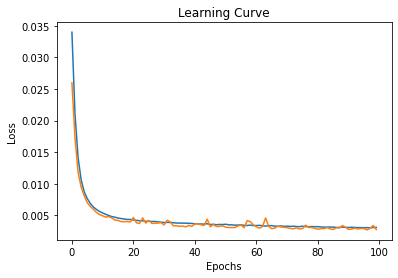

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


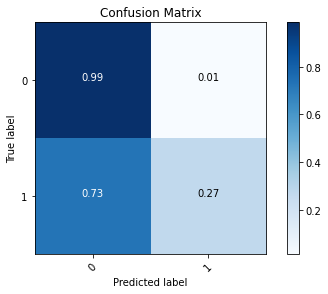

<Figure size 576x576 with 0 Axes>

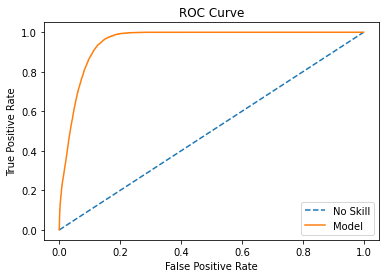

<Figure size 576x576 with 0 Axes>

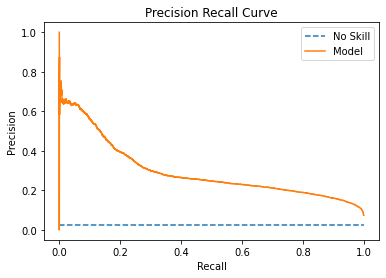

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98    355859
         1.0       0.32      0.27      0.29      8372

    accuracy                           0.97    364231
   macro avg       0.65      0.63      0.64    364231
weighted avg       0.97      0.97      0.97    364231

ROC AUC: 0.952
Precision Recall AUC: 0.295
F1 Score: 0.294
F2 Score: 0.278


In [4]:
train_path = DATADIR+'/train/slice-615-25-equal.csv'
test_path = DATADIR+'/test/slice-1637-10.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(8).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 100,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 1.b
Increase the size of training set to 50% of slice-615 whilst keeping the parameters the same.

### Parameters
- Data: 50% of slice 615 (equalized classes)
- Loss: BCELoss
- Optimizer: SGD(lr=0.001, momentum=0.9)
- Layers: (8, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 100

### Remarks
No significant improvement over exp 1a.

train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.025, valid loss: 0.016
epochs: 1, train loss: 0.011, valid loss: 0.008
epochs: 2, train loss: 0.007, valid loss: 0.006
epochs: 3, train loss: 0.006, valid loss: 0.006
epochs: 4, train loss: 0.006, valid loss: 0.006
epochs: 5, train loss: 0.005, valid loss: 0.005
epochs: 6, train loss: 0.005, valid loss: 0.005
epochs: 7, train loss: 0.005, valid loss: 0.005
epochs: 8, train loss: 0.005, valid loss: 0.005
epochs: 9, train loss: 0.005, valid loss: 0.005
epochs: 10, train loss: 0.005, valid loss: 0.005
epochs: 11, train loss: 0.005, valid loss: 0.005
epochs: 12, train loss: 0.005, valid loss: 0.005
epochs: 13, train loss: 0.005, valid loss: 0.005
epochs: 14, train loss: 0.005, valid loss: 0.005
epochs: 15, train loss: 0.005, valid loss: 0.005
epochs: 16, train loss: 0.005, valid loss: 0.005
epochs: 17, train loss: 0.005, valid loss: 0.005
epochs: 18, train loss: 0.005, valid loss: 0.005
epochs: 19, train 

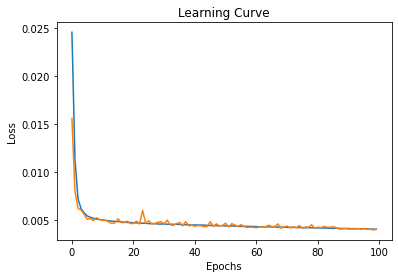

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


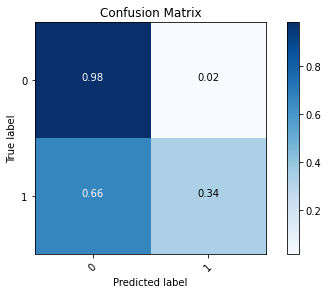

<Figure size 576x576 with 0 Axes>

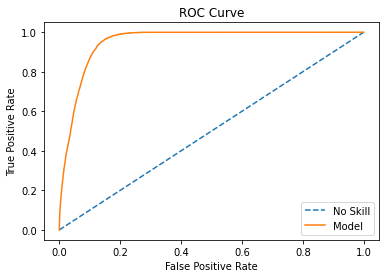

<Figure size 576x576 with 0 Axes>

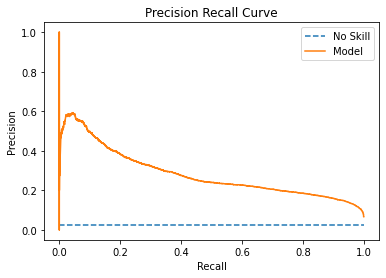

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    355859
         1.0       0.30      0.34      0.32      8372

    accuracy                           0.97    364231
   macro avg       0.64      0.66      0.65    364231
weighted avg       0.97      0.97      0.97    364231

ROC AUC: 0.952
Precision Recall AUC: 0.283
F1 Score: 0.319
F2 Score: 0.330


In [5]:
train_path = DATADIR+'/train/slice-615-50-equal.csv'
test_path = DATADIR+'/test/slice-1637-10.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(8).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 100,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 2
Use 50% slice 615 with difference of features.

### Parameters
- Data: 50% of slice 615 (equalized classes, diff)
- Loss: BCELoss
- Optimizer: SGD(lr=0.001, momentum=0.9)
- Layers: (4, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 100

### Remarks
Metrics improve significantly.

train size: 193898, valid size: 95502, test size: 364231
---
epochs: 0, train loss: 0.029, valid loss: 0.015
epochs: 1, train loss: 0.011, valid loss: 0.009
epochs: 2, train loss: 0.009, valid loss: 0.009
epochs: 3, train loss: 0.009, valid loss: 0.010
epochs: 4, train loss: 0.009, valid loss: 0.009
epochs: 5, train loss: 0.009, valid loss: 0.009
epochs: 6, train loss: 0.009, valid loss: 0.009
epochs: 7, train loss: 0.009, valid loss: 0.009
epochs: 8, train loss: 0.009, valid loss: 0.009
epochs: 9, train loss: 0.009, valid loss: 0.009
---


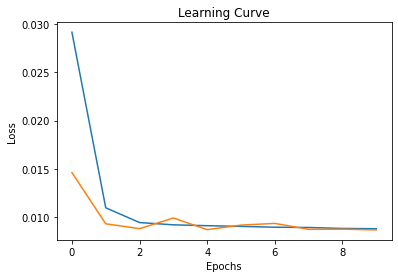

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


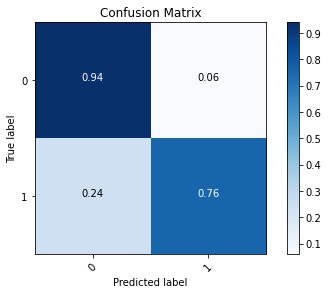

<Figure size 576x576 with 0 Axes>

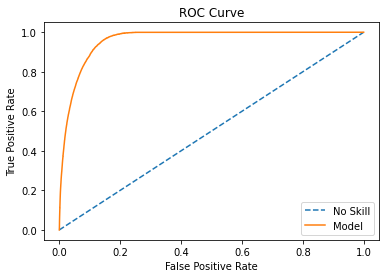

<Figure size 576x576 with 0 Axes>

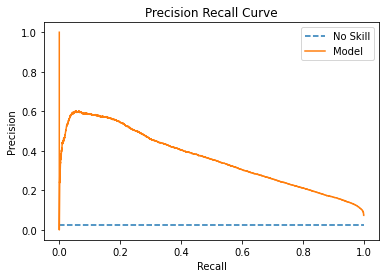

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97    355859
         1.0       0.23      0.76      0.35      8372

    accuracy                           0.94    364231
   macro avg       0.61      0.85      0.66    364231
weighted avg       0.98      0.94      0.95    364231

ROC AUC: 0.961
Precision Recall AUC: 0.360
F1 Score: 0.353
F2 Score: 0.519


In [8]:
train_path = DATADIR+'/train/slice-615-50-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)

## Experiment 2.a
Increase training data to 75% of slice 615 diff.
### Parameters
- Data: 75% of slice 615 (equalized classes, diff)
- Loss: BCELoss
- Optimizer: SGD(lr=0.001, momentum=0.9)
- Layers: (4, 10), (10, 8)
- Activation: hidden -> ReLu, output -> Sigmoid
- Epochs: 100

### Remarks
Not much different than 50%-diff.

train size: 407162, valid size: 200542, test size: 364231
---
epochs: 0, train loss: 0.020, valid loss: 0.010
epochs: 1, train loss: 0.009, valid loss: 0.009
epochs: 2, train loss: 0.009, valid loss: 0.009
epochs: 3, train loss: 0.008, valid loss: 0.009
epochs: 4, train loss: 0.008, valid loss: 0.008
epochs: 5, train loss: 0.008, valid loss: 0.008
epochs: 6, train loss: 0.008, valid loss: 0.008
epochs: 7, train loss: 0.008, valid loss: 0.009
epochs: 8, train loss: 0.008, valid loss: 0.008
epochs: 9, train loss: 0.008, valid loss: 0.008
---


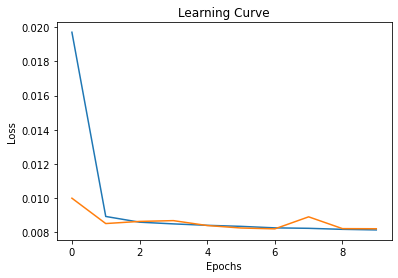

<Figure size 576x576 with 0 Axes>

Confusion matrix with normalization


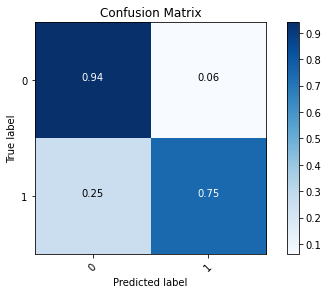

<Figure size 576x576 with 0 Axes>

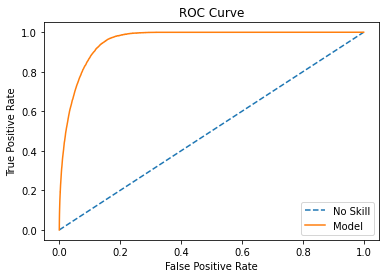

<Figure size 576x576 with 0 Axes>

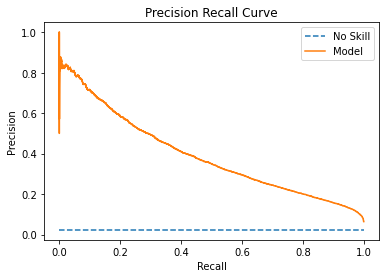

<Figure size 576x576 with 0 Axes>

Classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97    355859
         1.0       0.22      0.75      0.34      8372

    accuracy                           0.93    364231
   macro avg       0.61      0.84      0.65    364231
weighted avg       0.98      0.93      0.95    364231

ROC AUC: 0.958
Precision Recall AUC: 0.392
F1 Score: 0.344
F2 Score: 0.508


In [7]:
train_path = DATADIR+'/train/slice-615-75-equal-diff.csv'
test_path = DATADIR+'/test/slice-1637-10-diff.csv'
train_dl, valid_dl = data_pm.prepare_train_data(train_path,normalise=True)
test_dl = data_pm.prepare_test_data(test_path,normalise=True)
print("train size: {0}, valid size: {1}, test size: {2}".format(
    len(train_dl.dataset),len(valid_dl.dataset), len(test_dl.dataset)))

device = model_utils.get_device()
model = MLP(4).to(device)

params = {
    'model': model,
    'optimizer': SGD(model.parameters(), lr=0.001, momentum=0.9),
    'criterion': BCELoss(),
    'epochs': 10,
    'train_dl': train_dl,
    'valid_dl': valid_dl,
    'test_dl': test_dl,
    'device': device
}

metrics = model_utils.evaluate(**params)
model_eval.evaluate(**metrics)